Phase 4 Project Notebook by Ryan S. Chung

# Introduction

In [1]:
import pandas as pd
import numpy as np
import os , shutil
import glob

In [2]:
import cv2
import matplotlib.image as mpimg

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.image as mpimg

In [5]:
import time
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Initial MLP Creation

In order to create our MLP model, the images used from the training folder and validation folder were used.  The images were scaled and turned into vectors.

In [7]:
Train_NORMAL = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\*.jpeg")
Train_PNEUMONIA = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\PNEUMONIA\\*jpeg")

In [8]:
train_data = []
train_labels = []

In [9]:
for i in Train_NORMAL:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(0)
    
for i in Train_PNEUMONIA:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    train_data.append(image)
    train_labels.append(1)

In [10]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [11]:
Val_NORMAL = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\val\\NORMAL\\*.jpeg")
Val_PNEUMONIA = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\val\\PNEUMONIA\\*jpeg")

In [12]:
val_data = []
val_labels = []

In [13]:
for i in Val_NORMAL:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    val_data.append(image)
    val_labels.append(0)
    
for i in Val_PNEUMONIA:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    val_data.append(image)
    val_labels.append(1)

In [14]:
val_data = np.array(val_data)
val_labels = np.array(val_labels)

Label: 0


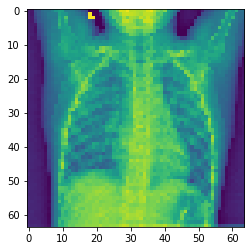

In [15]:
sample_image = train_data[0]
sample_label = train_labels[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

In [16]:
sample_image

array([[ 22,  16,  63, ..., 161,  95,  96],
       [ 22,  15,  57, ...,  98,  92,  91],
       [ 22,  18,  51, ..., 102,  90,  89],
       ...,
       [ 29,  27,  27, ...,  19,  23,  24],
       [ 28,  25,  25, ...,  21,  25,  24],
       [ 34,  29,  30, ...,  71,  73,  74]], dtype=uint8)

In [17]:
print(train_data.shape)
val_data.shape

(5216, 64, 64)


(16, 64, 64)

In [18]:
print(val_data.shape)

(16, 64, 64)


In [19]:
train_data = train_data.reshape(5216, 4096).astype('float')
val_data = val_data.reshape(16, 4096).astype('float')

In [20]:
print(train_data.shape)
val_data.shape

(5216, 4096)


(16, 4096)

In [21]:
train_data /= 255.
val_data /= 255.

In [22]:
val_labels[:4]

array([0, 0, 0, 0])

In [23]:
train_labels = keras.utils.to_categorical(train_labels, 2)
val_labels = keras.utils.to_categorical(val_labels, 2)

In [24]:
train_labels[0]

array([1., 0.], dtype=float32)

In [25]:
val_labels[0]

array([1., 0.], dtype=float32)

In [26]:
Model_1 = Sequential()
Model_1.add(Dense(64, activation = 'tanh', input_shape = (4096,)))
Model_1.add(Dense(2, activation = 'softmax'))

In [27]:
Model_1.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [28]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                262208    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 262,338
Trainable params: 262,338
Non-trainable params: 0
_________________________________________________________________


In [29]:
results_1 = Model_1.fit(train_data, train_labels, epochs = 12, batch_size = 64, validation_data = (val_data, val_labels))

Epoch 1/12
82/82 [==============================] - 0s 3ms/step - loss: 0.4975 - acc: 0.7820 - val_loss: 0.5601 - val_acc: 0.7500
Epoch 2/12
82/82 [==============================] - 0s 2ms/step - loss: 0.3349 - acc: 0.8627 - val_loss: 0.8401 - val_acc: 0.6250
Epoch 3/12
82/82 [==============================] - 0s 2ms/step - loss: 0.2829 - acc: 0.8832 - val_loss: 0.7442 - val_acc: 0.6875
Epoch 4/12
82/82 [==============================] - 0s 2ms/step - loss: 0.2399 - acc: 0.9041 - val_loss: 0.8846 - val_acc: 0.6250
Epoch 5/12
82/82 [==============================] - 0s 2ms/step - loss: 0.2153 - acc: 0.9133 - val_loss: 0.6916 - val_acc: 0.6875
Epoch 6/12
82/82 [==============================] - 0s 2ms/step - loss: 0.1845 - acc: 0.9271 - val_loss: 0.7350 - val_acc: 0.6875
Epoch 7/12
82/82 [==============================] - 0s 2ms/step - loss: 0.1765 - acc: 0.9294 - val_loss: 0.4802 - val_acc: 0.8125
Epoch 8/12
82/82 [==============================] - 0s 2ms/step - loss: 0.1749 - acc: 0.93

In [30]:
def visualize_training_results(results):
    
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

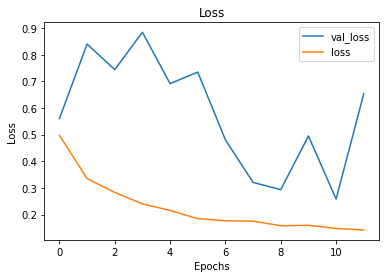

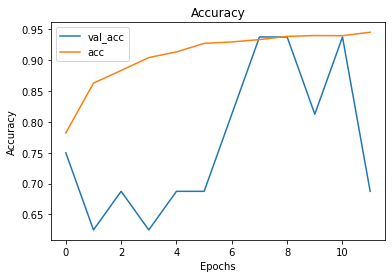

In [31]:
visualize_training_results(results_1)

In [32]:
Model_2 = Sequential()
Model_2.add(Dense(64, activation='tanh', input_shape=(4096,)))
Model_2.add(Dense(32, activation='tanh'))
Model_2.add(Dense(2, activation='softmax'))

In [33]:
Model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [34]:
Model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [35]:
results_2 = Model_2.fit(train_data, train_labels, batch_size=64, epochs=12, validation_data=(val_data, val_labels))

Epoch 1/12
82/82 [==============================] - 0s 3ms/step - loss: 0.4901 - acc: 0.7807 - val_loss: 0.7490 - val_acc: 0.6250
Epoch 2/12
82/82 [==============================] - 0s 2ms/step - loss: 0.3525 - acc: 0.8522 - val_loss: 0.4517 - val_acc: 0.7500
Epoch 3/12
82/82 [==============================] - 0s 2ms/step - loss: 0.2912 - acc: 0.8788 - val_loss: 1.2836 - val_acc: 0.5000
Epoch 4/12
82/82 [==============================] - 0s 2ms/step - loss: 0.2420 - acc: 0.8978 - val_loss: 0.4533 - val_acc: 0.8125
Epoch 5/12
82/82 [==============================] - 0s 2ms/step - loss: 0.2356 - acc: 0.9066 - val_loss: 0.7106 - val_acc: 0.6875
Epoch 6/12
82/82 [==============================] - 0s 2ms/step - loss: 0.1965 - acc: 0.9212 - val_loss: 0.6459 - val_acc: 0.7500
Epoch 7/12
82/82 [==============================] - 0s 2ms/step - loss: 0.1874 - acc: 0.9243 - val_loss: 0.2991 - val_acc: 0.9375
Epoch 8/12
82/82 [==============================] - 0s 2ms/step - loss: 0.1777 - acc: 0.92

In [36]:
def visualize_training_results(results):
    history = results.history
    
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

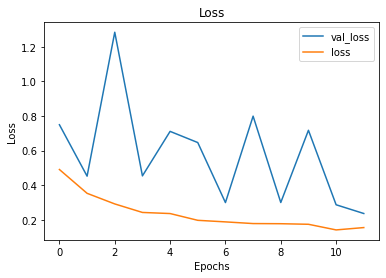

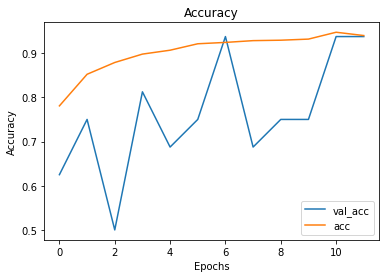

In [37]:
visualize_training_results(results_2)

In [38]:
Model_3 = Sequential()
Model_3.add(Dense(64, activation='relu', input_shape=(4096,)))
Model_3.add(Dense(32, activation='relu'))
Model_3.add(Dense(2, activation='softmax'))

In [39]:
Model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [40]:
Model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [41]:
results_3 = Model_3.fit(train_data, train_labels, epochs=12, batch_size=64, validation_data=(val_data, val_labels))

Epoch 1/12
82/82 [==============================] - 0s 3ms/step - loss: 0.4836 - acc: 0.7834 - val_loss: 0.4999 - val_acc: 0.7500
Epoch 2/12
82/82 [==============================] - 0s 2ms/step - loss: 0.3556 - acc: 0.8614 - val_loss: 1.3058 - val_acc: 0.5000
Epoch 3/12
82/82 [==============================] - 0s 2ms/step - loss: 0.3105 - acc: 0.8731 - val_loss: 0.5135 - val_acc: 0.7500
Epoch 4/12
82/82 [==============================] - 0s 2ms/step - loss: 0.2355 - acc: 0.9103 - val_loss: 0.5109 - val_acc: 0.7500
Epoch 5/12
82/82 [==============================] - 0s 2ms/step - loss: 0.2057 - acc: 0.9202 - val_loss: 0.9610 - val_acc: 0.6250
Epoch 6/12
82/82 [==============================] - 0s 2ms/step - loss: 0.2235 - acc: 0.9097 - val_loss: 0.3364 - val_acc: 0.8750
Epoch 7/12
82/82 [==============================] - 0s 2ms/step - loss: 0.1895 - acc: 0.9235 - val_loss: 0.4336 - val_acc: 0.8125
Epoch 8/12
82/82 [==============================] - 0s 2ms/step - loss: 0.1897 - acc: 0.92

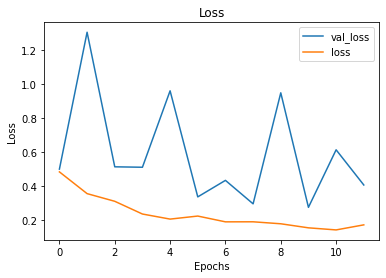

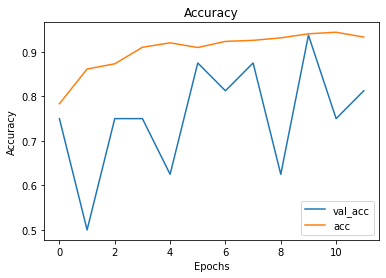

In [42]:
visualize_training_results(results_3)

In [43]:
results_train = Model_3.evaluate(train_data, train_labels)

163/163 [==============================] - 0s 852us/step - loss: 0.1234 - acc: 0.9509


In [44]:
results_test = Model_3.evaluate(val_data, val_labels)

1/1 [==============================] - 0s 1ms/step - loss: 0.4065 - acc: 0.8125


In [45]:
results_train

[0.1233837753534317, 0.9509202241897583]

In [46]:
results_test

[0.40651610493659973, 0.8125]

With the final MLP model having a 95% accuracy on the training images and a 81% on the validation images, the MLP model appears to be slightly overfitted.  One item of note is that the validation folder only housed 16 images where as the training folder of images had around 5000.

# Creation of CNN

In [47]:
# Creating a CNN

In [48]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test",
    target_size=(64, 64), batch_size = 180)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\val",
    target_size=(64, 64), batch_size = 200)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train",
    target_size=(64, 64), batch_size = 200)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [49]:
# Creating the data sets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [50]:
# Explore your dataset again

m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 200
Number of testing samples: 180
Number of validation samples: 16
train_images shape: (200, 64, 64, 3)
train_labels shape: (200, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (16, 64, 64, 3)
val_labels shape: (16, 2)


In [51]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(200, 12288)
(180, 12288)
(16, 12288)


In [52]:
train_y = np.reshape(train_labels[:,0], (200,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [53]:
# Sample Image Display from train

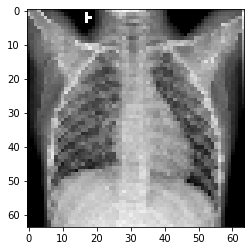

In [54]:
display(plt.imshow(train_images[0]))

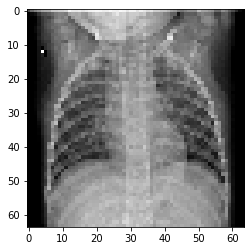

In [55]:
display(plt.imshow(train_images[1]))

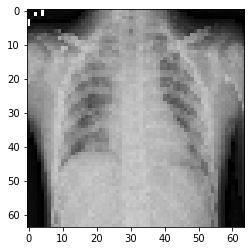

In [56]:
display(plt.imshow(train_images[2]))

In [57]:
from keras import models
from keras import layers
np.random.seed(123)

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [58]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
7/7 [==============================] - 0s 17ms/step - loss: 0.6731 - accuracy: 0.6600 - val_loss: 0.7154 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5606 - accuracy: 0.7900 - val_loss: 0.8324 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7900 - val_loss: 0.9217 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.7900 - val_loss: 0.8925 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7900 - val_loss: 0.8707 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7900 - val_loss: 0.8419 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7900 - val_loss: 0.9739 - val_accuracy: 0.5000
Epoch 8/50
7/7 [=================

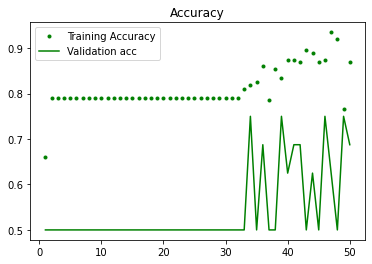

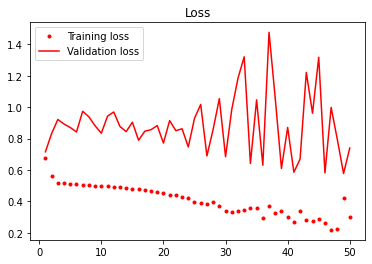

In [59]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [60]:
# visualize_training_results(history_A)

In [61]:
results_train = model.evaluate(train_img, train_y)

7/7 [==============================] - 0s 785us/step - loss: 0.1897 - accuracy: 0.9500


In [62]:
results_test = model.evaluate(test_img, test_y)

6/6 [==============================] - 0s 833us/step - loss: 0.6842 - accuracy: 0.6389


In [63]:
results_train

[0.18969713151454926, 0.949999988079071]

In [64]:
results_test

[0.6841866970062256, 0.6388888955116272]

In [65]:
# Building a CNN

In [66]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6457 - acc: 0.7950 - val_loss: 0.7240 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5637 - acc: 0.7900 - val_loss: 0.8100 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5228 - acc: 0.7900 - val_loss: 0.8936 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5163 - acc: 0.7900 - val_loss: 0.8975 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5160 - acc: 0.7900 - val_loss: 0.8965 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5137 - acc: 0.7900 - val_loss: 0.8797 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5143 - acc: 0.7900 - val_loss: 0.8815 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5101 - acc: 0.7900 - val

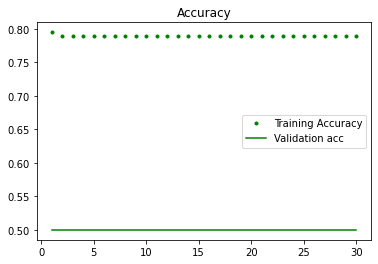

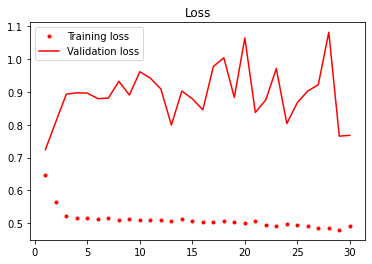

In [67]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [68]:
# visualize_training_results(history_B)

In [69]:
results_train = model.evaluate(train_images, train_y)

7/7 [==============================] - 0s 6ms/step - loss: 0.4916 - acc: 0.7900


In [70]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 6ms/step - loss: 0.6829 - acc: 0.5833


In [71]:
results_train

[0.49157267808914185, 0.7900000214576721]

In [72]:
results_test

[0.6828626394271851, 0.5833333134651184]

With an accuracy of 80% on the training images and an accuracy of 60% on the testing images, we can say this CNN is slightly overfitted.

# Grid Search Tuning

In [73]:
pip install talos

Note: you may need to restart the kernel to use updated packages.


In [74]:
import talos
import numpy

In [92]:
Train_NORMAL_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\*.jpeg")
Train_PNEUMONIA_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\PNEUMONIA\\*jpeg")

In [93]:
train_data_2 = []
train_labels_2 = []

In [94]:
for i in Train_NORMAL_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    train_data_2.append(image)
    train_labels_2.append(0)
    
for i in Train_PNEUMONIA_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    train_data_2.append(image)
    train_labels_2.append(1)

In [95]:
train_data_2 = np.array(train_data_2)
train_labels_2 = np.array(train_labels_2)

# X_train, X_test, y_train, y_test = train_test_split(data_2, labels_2, test_size=0.2, random_state=42)

In [96]:
Val_NORMAL_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\val\\NORMAL\\*.jpeg")
Val_PNEUMONIA_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\val\\PNEUMONIA\\*jpeg")

In [97]:
val_data_2 = []
val_labels_2 = []

In [99]:
for i in Val_NORMAL_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    val_data_2.append(image)
    val_labels_2.append(0)
    
for i in Val_PNEUMONIA_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    val_data_2.append(image)
    val_labels_2.append(1)

In [100]:
val_data_2 = np.array(val_data_2)
val_labels_2 = np.array(val_labels_2)

# X_train, X_test, y_train, y_test = train_test_split(data_2, labels_2, test_size=0.2, random_state=42)

In [102]:
def dense_network(train_data_2, train_labels_2, val_data_2, val_labels_2, params):
    
    model = models.Sequential()
    
    # hidden layers
    model.add(layers.Conv2D(32, (3, 3), activation=params['activation1'], input_shape=(64 ,64,  3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(32, (4, 4), activation=params['activation2']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation=params['activation3']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation=params['activation4']))
    model.add(layers.Dropout(params['dropout']))
    
    # output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=params['optimizer'],
              metrics=['acc'])

    out = model.fit(train_images,
                        train_y,
                        epochs=30,
                        batch_size=32,
                        validation_data=(val_images, val_y))
    return out, model

In [103]:
params = {'dropout': [0.1, 0.3, 0.5],
         'optimizer': ['adam', 'sgd'],
         'activation1': ['relu', 'tanh'],
         'activation2': ['relu', 'tanh'],
         'activation3': ['relu', 'tanh'],
         'activation4': ['relu', 'tanh'],}

In [104]:
results = talos.Scan(train_data_2, train_labels_2, params=params, model = dense_network, experiment_name='grid')

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5331 - acc: 0.7900 - val_loss: 0.8077 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5277 - acc: 0.7900 - val_loss: 1.0598 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5256 - acc: 0.7900 - val_loss: 0.7280 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 55ms/step - loss: 0.5052 - acc: 0.7900 - val_loss: 0.9007 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4515 - acc: 0.8000 - val_loss: 0.8128 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3821 - acc: 0.8150 - val_loss: 0.7021 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3100 - acc: 0.8950 - val_loss: 1.1170 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2550 - acc: 0.9150 - val

  1%|          | 1/96 [00:09<15:44,  9.94s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6630 - acc: 0.6350 - val_loss: 0.7198 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5627 - acc: 0.7900 - val_loss: 0.8057 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5267 - acc: 0.7900 - val_loss: 0.8987 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5146 - acc: 0.7900 - val_loss: 0.9467 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5254 - acc: 0.7900 - val_loss: 0.9115 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5149 - acc: 0.7900 - val_loss: 0.8507 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5097 - acc: 0.7900 - val_loss: 0.9477 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5132 - acc: 0.7900 - val

  2%|▏         | 2/96 [00:19<15:29,  9.89s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.5971 - acc: 0.7050 - val_loss: 0.9972 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5841 - acc: 0.7900 - val_loss: 0.7351 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5352 - acc: 0.7900 - val_loss: 1.0454 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5349 - acc: 0.7900 - val_loss: 0.8036 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5215 - acc: 0.7900 - val_loss: 0.8441 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5069 - acc: 0.7900 - val_loss: 0.8441 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4873 - acc: 0.7900 - val_loss: 1.1617 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4853 - acc: 0.7900 - val

  3%|▎         | 3/96 [00:28<15:02,  9.71s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6485 - acc: 0.7150 - val_loss: 0.7221 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5593 - acc: 0.7900 - val_loss: 0.7811 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5359 - acc: 0.7900 - val_loss: 0.8482 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5335 - acc: 0.7900 - val_loss: 0.8255 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5264 - acc: 0.7900 - val_loss: 0.8170 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5244 - acc: 0.7900 - val_loss: 0.8925 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5199 - acc: 0.7900 - val_loss: 0.9338 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5341 - acc: 0.7900 - val

  4%|▍         | 4/96 [00:38<14:40,  9.58s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5716 - acc: 0.7400 - val_loss: 1.0107 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5622 - acc: 0.7900 - val_loss: 0.7517 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5467 - acc: 0.7900 - val_loss: 0.9817 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5315 - acc: 0.7900 - val_loss: 0.8739 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5276 - acc: 0.7900 - val_loss: 0.9143 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5094 - acc: 0.7900 - val_loss: 0.7717 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4877 - acc: 0.7900 - val_loss: 0.9982 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4680 - acc: 0.8000 - val

  5%|▌         | 5/96 [00:47<14:27,  9.54s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6698 - acc: 0.6900 - val_loss: 0.7065 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5983 - acc: 0.7900 - val_loss: 0.7378 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5518 - acc: 0.7900 - val_loss: 0.8114 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5208 - acc: 0.7900 - val_loss: 0.8754 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5424 - acc: 0.7900 - val_loss: 0.8771 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5186 - acc: 0.7900 - val_loss: 0.9081 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5329 - acc: 0.7900 - val_loss: 0.9467 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5534 - acc: 0.7900 - val

  6%|▋         | 6/96 [00:57<14:14,  9.49s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5654 - acc: 0.7100 - val_loss: 0.7944 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5345 - acc: 0.7900 - val_loss: 0.9098 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5109 - acc: 0.7900 - val_loss: 0.9857 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5161 - acc: 0.7900 - val_loss: 0.7643 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4802 - acc: 0.7900 - val_loss: 1.0278 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4347 - acc: 0.8250 - val_loss: 1.3124 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4421 - acc: 0.8400 - val_loss: 0.7051 - val_acc: 0.5625
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2838 - acc: 0.8800 - val

  7%|▋         | 7/96 [01:06<14:04,  9.49s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5963 - acc: 0.7900 - val_loss: 0.7735 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5368 - acc: 0.7900 - val_loss: 0.7794 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5289 - acc: 0.7900 - val_loss: 0.8474 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5161 - acc: 0.7900 - val_loss: 0.8949 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5104 - acc: 0.7900 - val_loss: 0.8658 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5124 - acc: 0.7900 - val_loss: 0.8659 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5160 - acc: 0.7900 - val_loss: 0.8296 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5096 - acc: 0.7900 - val

  8%|▊         | 8/96 [01:16<13:54,  9.48s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5585 - acc: 0.7300 - val_loss: 1.1892 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5444 - acc: 0.7900 - val_loss: 0.8445 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5156 - acc: 0.7900 - val_loss: 0.8052 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4829 - acc: 0.7900 - val_loss: 0.9205 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4291 - acc: 0.7950 - val_loss: 0.8934 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3767 - acc: 0.8200 - val_loss: 0.9307 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3291 - acc: 0.8600 - val_loss: 1.0676 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2817 - acc: 0.8950 - val

  9%|▉         | 9/96 [01:25<13:44,  9.48s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6787 - acc: 0.6600 - val_loss: 0.6977 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6334 - acc: 0.7900 - val_loss: 0.7141 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5785 - acc: 0.7900 - val_loss: 0.7630 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5454 - acc: 0.7900 - val_loss: 0.7979 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5314 - acc: 0.7900 - val_loss: 0.7959 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5238 - acc: 0.7900 - val_loss: 0.8648 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5208 - acc: 0.7900 - val_loss: 0.8931 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5161 - acc: 0.7900 - val

 10%|█         | 10/96 [01:34<13:33,  9.46s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5743 - acc: 0.7550 - val_loss: 0.8085 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5337 - acc: 0.7900 - val_loss: 0.8281 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5699 - acc: 0.7900 - val_loss: 0.8670 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5470 - acc: 0.7900 - val_loss: 0.8574 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4923 - acc: 0.7900 - val_loss: 0.8441 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4617 - acc: 0.7900 - val_loss: 0.8087 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3742 - acc: 0.8350 - val_loss: 0.5768 - val_acc: 0.7500
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3677 - acc: 0.8550 - val

 11%|█▏        | 11/96 [01:44<13:27,  9.50s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6166 - acc: 0.7350 - val_loss: 0.8060 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5400 - acc: 0.7900 - val_loss: 0.8842 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5287 - acc: 0.7900 - val_loss: 0.8385 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5159 - acc: 0.7900 - val_loss: 0.7891 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5200 - acc: 0.7900 - val_loss: 0.8930 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5223 - acc: 0.7900 - val_loss: 0.9468 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5192 - acc: 0.7900 - val_loss: 0.8288 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5253 - acc: 0.7900 - val

 12%|█▎        | 12/96 [01:53<13:15,  9.47s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5552 - acc: 0.7900 - val_loss: 0.8600 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5592 - acc: 0.7900 - val_loss: 0.7662 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5184 - acc: 0.7900 - val_loss: 0.9858 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5223 - acc: 0.7900 - val_loss: 0.7662 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4793 - acc: 0.7900 - val_loss: 1.0011 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4616 - acc: 0.7900 - val_loss: 0.7225 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4205 - acc: 0.8000 - val_loss: 0.9656 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3826 - acc: 0.8350 - val

 14%|█▎        | 13/96 [02:03<13:07,  9.49s/it]

Epoch 1/30
7/7 [==============================] - 0s 52ms/step - loss: 0.6583 - acc: 0.6950 - val_loss: 0.7131 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5746 - acc: 0.7900 - val_loss: 0.7630 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5343 - acc: 0.7900 - val_loss: 0.8336 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5227 - acc: 0.7900 - val_loss: 0.8160 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5143 - acc: 0.7900 - val_loss: 0.8942 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5197 - acc: 0.7900 - val_loss: 0.8616 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5132 - acc: 0.7900 - val_loss: 0.9076 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5129 - acc: 0.7900 - val

 15%|█▍        | 14/96 [02:13<13:03,  9.56s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6189 - acc: 0.6900 - val_loss: 0.7513 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5291 - acc: 0.7900 - val_loss: 1.0206 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5245 - acc: 0.7900 - val_loss: 0.8806 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5179 - acc: 0.7900 - val_loss: 0.8159 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4897 - acc: 0.7900 - val_loss: 0.9276 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5122 - acc: 0.7900 - val_loss: 1.0040 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4806 - acc: 0.7900 - val_loss: 0.7386 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4451 - acc: 0.7900 - val

 16%|█▌        | 15/96 [02:22<12:56,  9.58s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5998 - acc: 0.7650 - val_loss: 0.7987 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5226 - acc: 0.7900 - val_loss: 0.8959 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5254 - acc: 0.7900 - val_loss: 0.8857 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5132 - acc: 0.7900 - val_loss: 0.9250 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4985 - acc: 0.7900 - val_loss: 0.9079 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5027 - acc: 0.7900 - val_loss: 0.8613 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4999 - acc: 0.7900 - val_loss: 0.8605 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5007 - acc: 0.7900 - val

 17%|█▋        | 16/96 [02:32<12:47,  9.59s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6375 - acc: 0.7050 - val_loss: 0.7668 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5502 - acc: 0.7900 - val_loss: 0.9108 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5041 - acc: 0.7900 - val_loss: 0.8610 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4914 - acc: 0.7900 - val_loss: 0.7889 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5105 - acc: 0.7900 - val_loss: 1.1207 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5143 - acc: 0.7900 - val_loss: 0.7927 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4858 - acc: 0.7900 - val_loss: 0.7861 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4227 - acc: 0.7950 - val

 18%|█▊        | 17/96 [02:42<12:40,  9.63s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6130 - acc: 0.7100 - val_loss: 0.7894 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5351 - acc: 0.7900 - val_loss: 0.8386 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5480 - acc: 0.7900 - val_loss: 0.9255 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5299 - acc: 0.7900 - val_loss: 0.9108 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5208 - acc: 0.7900 - val_loss: 0.9126 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5306 - acc: 0.7900 - val_loss: 0.9477 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5438 - acc: 0.7900 - val_loss: 0.8675 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5053 - acc: 0.7900 - val

 19%|█▉        | 18/96 [02:51<12:28,  9.59s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6091 - acc: 0.7850 - val_loss: 0.9245 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5123 - acc: 0.7900 - val_loss: 0.8279 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4807 - acc: 0.7900 - val_loss: 0.8811 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4658 - acc: 0.7900 - val_loss: 0.7167 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4159 - acc: 0.8500 - val_loss: 0.9754 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3293 - acc: 0.8900 - val_loss: 1.1800 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2439 - acc: 0.9150 - val_loss: 1.0233 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.1874 - acc: 0.9300 - val

 20%|█▉        | 19/96 [03:00<12:03,  9.40s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6008 - acc: 0.7100 - val_loss: 0.8391 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5267 - acc: 0.7900 - val_loss: 0.8634 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5128 - acc: 0.7900 - val_loss: 0.9279 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5096 - acc: 0.7900 - val_loss: 0.9103 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5069 - acc: 0.7900 - val_loss: 0.9461 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5078 - acc: 0.7900 - val_loss: 0.9609 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5046 - acc: 0.7900 - val_loss: 0.9843 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5006 - acc: 0.7900 - val

 21%|██        | 20/96 [03:09<11:42,  9.24s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6161 - acc: 0.6900 - val_loss: 1.3545 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5430 - acc: 0.7900 - val_loss: 0.7025 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5245 - acc: 0.7900 - val_loss: 1.0888 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4831 - acc: 0.7900 - val_loss: 0.7770 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4481 - acc: 0.7900 - val_loss: 0.9184 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3850 - acc: 0.8150 - val_loss: 0.9566 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3128 - acc: 0.8700 - val_loss: 1.0936 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2636 - acc: 0.8700 - val

 22%|██▏       | 21/96 [03:19<11:41,  9.36s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5489 - acc: 0.7900 - val_loss: 0.8511 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5051 - acc: 0.7900 - val_loss: 0.8758 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5253 - acc: 0.7900 - val_loss: 0.9127 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5216 - acc: 0.7900 - val_loss: 0.9686 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5143 - acc: 0.7900 - val_loss: 0.9016 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5164 - acc: 0.7900 - val_loss: 0.7868 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5193 - acc: 0.7900 - val_loss: 1.0501 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5032 - acc: 0.7900 - val

 23%|██▎       | 22/96 [03:28<11:37,  9.42s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6283 - acc: 0.7450 - val_loss: 0.9707 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5389 - acc: 0.7900 - val_loss: 0.7497 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5163 - acc: 0.7900 - val_loss: 1.0285 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4898 - acc: 0.7900 - val_loss: 0.7222 - val_acc: 0.5625
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4756 - acc: 0.8150 - val_loss: 0.8886 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4017 - acc: 0.8250 - val_loss: 0.7319 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3621 - acc: 0.8600 - val_loss: 0.8417 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3107 - acc: 0.8450 - val

 24%|██▍       | 23/96 [03:38<11:30,  9.46s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.5806 - acc: 0.7850 - val_loss: 0.8739 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5205 - acc: 0.7900 - val_loss: 0.9119 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5220 - acc: 0.7900 - val_loss: 0.8527 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5220 - acc: 0.7900 - val_loss: 0.9169 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5194 - acc: 0.7900 - val_loss: 0.8165 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5241 - acc: 0.7900 - val_loss: 0.9260 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5254 - acc: 0.7900 - val_loss: 0.9674 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5098 - acc: 0.7900 - val

 25%|██▌       | 24/96 [03:47<11:16,  9.40s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5727 - acc: 0.7100 - val_loss: 0.7599 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5476 - acc: 0.7900 - val_loss: 0.9664 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5165 - acc: 0.7900 - val_loss: 0.9396 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5074 - acc: 0.7900 - val_loss: 0.8722 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4943 - acc: 0.7900 - val_loss: 0.9240 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4770 - acc: 0.7900 - val_loss: 0.7969 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4670 - acc: 0.7900 - val_loss: 1.0133 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4070 - acc: 0.7900 - val

 26%|██▌       | 25/96 [03:57<11:10,  9.44s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6479 - acc: 0.6900 - val_loss: 0.7273 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5524 - acc: 0.7900 - val_loss: 0.7875 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5178 - acc: 0.7900 - val_loss: 0.9106 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5165 - acc: 0.7900 - val_loss: 0.8521 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5088 - acc: 0.7900 - val_loss: 0.9010 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5165 - acc: 0.7900 - val_loss: 0.9408 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5114 - acc: 0.7900 - val_loss: 0.8808 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5063 - acc: 0.7900 - val

 27%|██▋       | 26/96 [04:06<10:55,  9.37s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.5794 - acc: 0.7700 - val_loss: 0.7391 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5471 - acc: 0.7900 - val_loss: 0.9089 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5762 - acc: 0.7900 - val_loss: 0.7517 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5116 - acc: 0.7900 - val_loss: 1.0739 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4840 - acc: 0.7900 - val_loss: 0.7306 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4817 - acc: 0.7900 - val_loss: 0.9758 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4424 - acc: 0.7950 - val_loss: 0.7487 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3916 - acc: 0.7950 - val

 28%|██▊       | 27/96 [04:15<10:42,  9.31s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6439 - acc: 0.7650 - val_loss: 0.7190 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5732 - acc: 0.7900 - val_loss: 0.7801 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5258 - acc: 0.7900 - val_loss: 0.8630 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5089 - acc: 0.7900 - val_loss: 0.9150 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5111 - acc: 0.7900 - val_loss: 0.9064 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5267 - acc: 0.7900 - val_loss: 0.8390 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5208 - acc: 0.7900 - val_loss: 0.8615 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5222 - acc: 0.7900 - val

 29%|██▉       | 28/96 [04:24<10:32,  9.30s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.5491 - acc: 0.7750 - val_loss: 0.9964 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5218 - acc: 0.7900 - val_loss: 0.9999 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5329 - acc: 0.7900 - val_loss: 0.9937 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5104 - acc: 0.7900 - val_loss: 0.7911 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4572 - acc: 0.7900 - val_loss: 1.0821 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4142 - acc: 0.7900 - val_loss: 0.7737 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3790 - acc: 0.8050 - val_loss: 0.6815 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3336 - acc: 0.8450 - val

 30%|███       | 29/96 [04:33<10:21,  9.28s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6723 - acc: 0.6100 - val_loss: 0.7064 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5895 - acc: 0.7850 - val_loss: 0.7489 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5610 - acc: 0.7900 - val_loss: 0.8032 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5398 - acc: 0.7900 - val_loss: 0.8697 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5355 - acc: 0.7900 - val_loss: 0.8159 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5270 - acc: 0.7900 - val_loss: 0.8039 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5396 - acc: 0.7900 - val_loss: 0.7796 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5291 - acc: 0.7900 - val

 31%|███▏      | 30/96 [04:43<10:11,  9.26s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.5519 - acc: 0.7850 - val_loss: 0.9259 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5411 - acc: 0.7900 - val_loss: 0.7696 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4931 - acc: 0.7900 - val_loss: 0.7975 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4327 - acc: 0.8000 - val_loss: 0.9881 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3825 - acc: 0.8300 - val_loss: 0.8034 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3508 - acc: 0.8700 - val_loss: 1.2755 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3291 - acc: 0.8300 - val_loss: 0.6439 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2147 - acc: 0.9300 - val

 32%|███▏      | 31/96 [04:52<10:03,  9.28s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5945 - acc: 0.7350 - val_loss: 0.8180 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5294 - acc: 0.7900 - val_loss: 0.9514 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5161 - acc: 0.7900 - val_loss: 0.8971 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5126 - acc: 0.7900 - val_loss: 0.8936 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5117 - acc: 0.7900 - val_loss: 0.8403 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5052 - acc: 0.7900 - val_loss: 0.8835 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5021 - acc: 0.7900 - val_loss: 0.8487 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5001 - acc: 0.7900 - val

 33%|███▎      | 32/96 [05:01<09:52,  9.25s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5969 - acc: 0.7400 - val_loss: 0.7277 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5209 - acc: 0.7900 - val_loss: 1.2699 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5105 - acc: 0.7900 - val_loss: 0.9432 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4970 - acc: 0.7900 - val_loss: 0.7110 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4522 - acc: 0.8350 - val_loss: 1.0691 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3909 - acc: 0.8450 - val_loss: 1.0445 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3174 - acc: 0.8850 - val_loss: 0.9865 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2585 - acc: 0.8950 - val

 34%|███▍      | 33/96 [05:11<09:46,  9.32s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.5545 - acc: 0.7850 - val_loss: 0.8333 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5310 - acc: 0.7900 - val_loss: 0.8307 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5145 - acc: 0.7900 - val_loss: 0.9225 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5242 - acc: 0.7900 - val_loss: 1.0151 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5116 - acc: 0.7900 - val_loss: 0.9738 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5143 - acc: 0.7900 - val_loss: 1.0573 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5066 - acc: 0.7900 - val_loss: 0.8957 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5218 - acc: 0.7900 - val

 35%|███▌      | 34/96 [05:20<09:34,  9.26s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6424 - acc: 0.7150 - val_loss: 0.8475 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5394 - acc: 0.7900 - val_loss: 0.8364 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5370 - acc: 0.7950 - val_loss: 0.7979 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5061 - acc: 0.7900 - val_loss: 0.7976 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4645 - acc: 0.8000 - val_loss: 0.9382 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4155 - acc: 0.8400 - val_loss: 0.9612 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3853 - acc: 0.8350 - val_loss: 0.5525 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3115 - acc: 0.8900 - val

 36%|███▋      | 35/96 [05:29<09:22,  9.22s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.5792 - acc: 0.7350 - val_loss: 0.7995 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5277 - acc: 0.7900 - val_loss: 0.7543 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5345 - acc: 0.7900 - val_loss: 0.7960 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5155 - acc: 0.7900 - val_loss: 0.9352 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5176 - acc: 0.7900 - val_loss: 0.6881 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5575 - acc: 0.7700 - val_loss: 0.9364 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5139 - acc: 0.7900 - val_loss: 0.7767 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5145 - acc: 0.7900 - val

 38%|███▊      | 36/96 [05:38<09:07,  9.12s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.5755 - acc: 0.7900 - val_loss: 1.0057 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4841 - acc: 0.7900 - val_loss: 0.9787 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4859 - acc: 0.8100 - val_loss: 1.0648 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3917 - acc: 0.8050 - val_loss: 0.6682 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3581 - acc: 0.8600 - val_loss: 0.7216 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2911 - acc: 0.8850 - val_loss: 1.1552 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.2278 - acc: 0.9150 - val_loss: 0.8448 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.1847 - acc: 0.9250 - val

 39%|███▊      | 37/96 [05:47<09:00,  9.16s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5824 - acc: 0.7900 - val_loss: 0.7943 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5222 - acc: 0.7900 - val_loss: 0.9449 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5158 - acc: 0.7900 - val_loss: 0.9385 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5186 - acc: 0.7900 - val_loss: 0.8859 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5071 - acc: 0.7900 - val_loss: 0.8492 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5146 - acc: 0.7900 - val_loss: 0.8094 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5131 - acc: 0.7900 - val_loss: 0.9047 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5021 - acc: 0.7900 - val

 40%|███▉      | 38/96 [05:56<08:50,  9.14s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6091 - acc: 0.6950 - val_loss: 0.7881 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5592 - acc: 0.7900 - val_loss: 0.9763 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5254 - acc: 0.7900 - val_loss: 0.8019 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4937 - acc: 0.7900 - val_loss: 1.0164 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5115 - acc: 0.7900 - val_loss: 0.7396 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4789 - acc: 0.7900 - val_loss: 0.9212 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4361 - acc: 0.7900 - val_loss: 0.8683 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3928 - acc: 0.8000 - val

 41%|████      | 39/96 [06:06<08:46,  9.24s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6227 - acc: 0.6900 - val_loss: 0.8015 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5226 - acc: 0.7900 - val_loss: 0.8171 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5014 - acc: 0.7900 - val_loss: 0.8409 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5108 - acc: 0.7900 - val_loss: 0.8367 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5134 - acc: 0.7900 - val_loss: 0.9248 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4921 - acc: 0.7900 - val_loss: 0.9568 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5034 - acc: 0.7900 - val_loss: 0.8234 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4997 - acc: 0.7900 - val

 42%|████▏     | 40/96 [06:15<08:38,  9.25s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5920 - acc: 0.7500 - val_loss: 0.7018 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5824 - acc: 0.7750 - val_loss: 0.8739 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5199 - acc: 0.7900 - val_loss: 0.8247 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5227 - acc: 0.7800 - val_loss: 1.0760 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4825 - acc: 0.7950 - val_loss: 0.7688 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4683 - acc: 0.8000 - val_loss: 1.1816 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4706 - acc: 0.7900 - val_loss: 0.6487 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4321 - acc: 0.8350 - val

 43%|████▎     | 41/96 [06:24<08:30,  9.29s/it]

Epoch 1/30
7/7 [==============================] - 0s 52ms/step - loss: 0.6239 - acc: 0.7250 - val_loss: 0.7714 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5459 - acc: 0.7900 - val_loss: 0.8789 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5054 - acc: 0.7900 - val_loss: 0.9127 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5045 - acc: 0.7900 - val_loss: 0.8713 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5197 - acc: 0.7900 - val_loss: 0.9080 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5278 - acc: 0.7900 - val_loss: 0.9179 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5223 - acc: 0.7900 - val_loss: 0.9060 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5242 - acc: 0.7900 - val

 44%|████▍     | 42/96 [06:34<08:23,  9.33s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.7124 - acc: 0.7050 - val_loss: 1.1162 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4886 - acc: 0.7900 - val_loss: 0.8760 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4534 - acc: 0.7900 - val_loss: 0.6196 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4414 - acc: 0.8500 - val_loss: 1.2778 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3844 - acc: 0.8300 - val_loss: 0.5512 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3554 - acc: 0.8700 - val_loss: 0.6624 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3026 - acc: 0.8800 - val_loss: 0.7851 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2106 - acc: 0.9300 - val

 45%|████▍     | 43/96 [06:43<08:19,  9.42s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5619 - acc: 0.7800 - val_loss: 0.8782 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5129 - acc: 0.7900 - val_loss: 1.0539 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5190 - acc: 0.7900 - val_loss: 1.0592 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5222 - acc: 0.7900 - val_loss: 0.8907 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5115 - acc: 0.7900 - val_loss: 0.8421 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5066 - acc: 0.7900 - val_loss: 0.9724 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5150 - acc: 0.7900 - val_loss: 0.9981 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5080 - acc: 0.7900 - val

 46%|████▌     | 44/96 [06:53<08:08,  9.39s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.7406 - acc: 0.5850 - val_loss: 1.0861 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5035 - acc: 0.7900 - val_loss: 0.8878 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4924 - acc: 0.7900 - val_loss: 0.7030 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4292 - acc: 0.8450 - val_loss: 1.3341 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4795 - acc: 0.8250 - val_loss: 0.7831 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3853 - acc: 0.8200 - val_loss: 0.8303 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3194 - acc: 0.8750 - val_loss: 0.7134 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2685 - acc: 0.8950 - val

 47%|████▋     | 45/96 [07:02<07:56,  9.34s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.5621 - acc: 0.7800 - val_loss: 0.8949 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5311 - acc: 0.7900 - val_loss: 0.8184 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5210 - acc: 0.7900 - val_loss: 0.8459 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5202 - acc: 0.7900 - val_loss: 0.8999 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5082 - acc: 0.7900 - val_loss: 0.8838 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5016 - acc: 0.7900 - val_loss: 0.7947 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5083 - acc: 0.7900 - val_loss: 0.9748 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5090 - acc: 0.7900 - val

 48%|████▊     | 46/96 [07:11<07:46,  9.33s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6050 - acc: 0.6850 - val_loss: 0.8142 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4860 - acc: 0.7900 - val_loss: 0.7422 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4164 - acc: 0.8350 - val_loss: 0.8013 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 0.3141 - acc: 0.8700 - val_loss: 1.9534 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 39ms/step - loss: 0.4563 - acc: 0.8250 - val_loss: 1.3553 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3534 - acc: 0.8450 - val_loss: 0.6087 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.2430 - acc: 0.9100 - val_loss: 1.0733 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.2395 - acc: 0.9050 - val

 49%|████▉     | 47/96 [07:21<07:40,  9.41s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.5891 - acc: 0.7050 - val_loss: 0.8073 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5295 - acc: 0.7900 - val_loss: 1.1238 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5134 - acc: 0.7900 - val_loss: 0.8691 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5088 - acc: 0.7900 - val_loss: 0.9492 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4871 - acc: 0.7900 - val_loss: 0.8234 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4939 - acc: 0.7850 - val_loss: 0.9345 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5068 - acc: 0.7900 - val_loss: 1.0541 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4973 - acc: 0.7900 - val

 50%|█████     | 48/96 [07:30<07:30,  9.39s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.5546 - acc: 0.7100 - val_loss: 0.9656 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5360 - acc: 0.7900 - val_loss: 0.7589 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5092 - acc: 0.7900 - val_loss: 1.0770 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5078 - acc: 0.7900 - val_loss: 0.7932 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4765 - acc: 0.7900 - val_loss: 0.9955 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4881 - acc: 0.7900 - val_loss: 0.9194 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4702 - acc: 0.7900 - val_loss: 0.7279 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5151 - acc: 0.8700 - val

 51%|█████     | 49/96 [07:40<07:24,  9.47s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6112 - acc: 0.7750 - val_loss: 0.8022 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5294 - acc: 0.7900 - val_loss: 0.7748 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5228 - acc: 0.7900 - val_loss: 0.9538 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5171 - acc: 0.7900 - val_loss: 0.8960 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5129 - acc: 0.7900 - val_loss: 0.8057 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5072 - acc: 0.7900 - val_loss: 0.9480 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5061 - acc: 0.7900 - val_loss: 0.9551 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5033 - acc: 0.7900 - val

 52%|█████▏    | 50/96 [07:49<07:17,  9.51s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6004 - acc: 0.6900 - val_loss: 0.9917 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5202 - acc: 0.7900 - val_loss: 0.7926 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5219 - acc: 0.7900 - val_loss: 0.8897 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5160 - acc: 0.7900 - val_loss: 0.9132 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4922 - acc: 0.7900 - val_loss: 1.0171 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4832 - acc: 0.7900 - val_loss: 0.7116 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4779 - acc: 0.7900 - val_loss: 1.0421 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4575 - acc: 0.7900 - val

 53%|█████▎    | 51/96 [07:59<07:07,  9.50s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6103 - acc: 0.7900 - val_loss: 0.7581 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5370 - acc: 0.7900 - val_loss: 0.8166 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5215 - acc: 0.7900 - val_loss: 0.8573 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5218 - acc: 0.7900 - val_loss: 0.8957 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5347 - acc: 0.7900 - val_loss: 0.8606 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5229 - acc: 0.7900 - val_loss: 0.8919 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5077 - acc: 0.7900 - val_loss: 0.8864 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5186 - acc: 0.7900 - val

 54%|█████▍    | 52/96 [08:08<06:55,  9.44s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5734 - acc: 0.7300 - val_loss: 1.0048 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5556 - acc: 0.7900 - val_loss: 0.8033 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5062 - acc: 0.7900 - val_loss: 1.1207 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5843 - acc: 0.7900 - val_loss: 0.7861 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5084 - acc: 0.7900 - val_loss: 1.0079 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5445 - acc: 0.7900 - val_loss: 0.8504 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5078 - acc: 0.7900 - val_loss: 0.8667 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4997 - acc: 0.7900 - val

 55%|█████▌    | 53/96 [08:17<06:45,  9.43s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6500 - acc: 0.6700 - val_loss: 0.7241 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5598 - acc: 0.7900 - val_loss: 0.8025 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5454 - acc: 0.7850 - val_loss: 0.8530 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5495 - acc: 0.7900 - val_loss: 0.8947 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5398 - acc: 0.7900 - val_loss: 0.9166 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5317 - acc: 0.7900 - val_loss: 0.8504 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5382 - acc: 0.7900 - val_loss: 0.8865 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5155 - acc: 0.7900 - val

 56%|█████▋    | 54/96 [08:27<06:37,  9.47s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6063 - acc: 0.7000 - val_loss: 0.7695 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5090 - acc: 0.7900 - val_loss: 0.7359 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5139 - acc: 0.7900 - val_loss: 1.0767 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4815 - acc: 0.7900 - val_loss: 0.8223 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4189 - acc: 0.8150 - val_loss: 0.9921 - val_acc: 0.5625
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3553 - acc: 0.8500 - val_loss: 1.1132 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3506 - acc: 0.8700 - val_loss: 1.2553 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2702 - acc: 0.8650 - val

 57%|█████▋    | 55/96 [08:36<06:26,  9.43s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6362 - acc: 0.7150 - val_loss: 0.7729 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5382 - acc: 0.7900 - val_loss: 0.8549 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5170 - acc: 0.7900 - val_loss: 0.8688 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5152 - acc: 0.7900 - val_loss: 0.8752 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5229 - acc: 0.7900 - val_loss: 1.0117 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5190 - acc: 0.7900 - val_loss: 0.9577 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5189 - acc: 0.7900 - val_loss: 0.7992 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5188 - acc: 0.7900 - val

 58%|█████▊    | 56/96 [08:46<06:17,  9.44s/it]

Epoch 1/30
7/7 [==============================] - 0s 52ms/step - loss: 0.6017 - acc: 0.7150 - val_loss: 0.7044 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5379 - acc: 0.7900 - val_loss: 0.9392 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5066 - acc: 0.7900 - val_loss: 0.7973 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4888 - acc: 0.7900 - val_loss: 0.8365 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4715 - acc: 0.7900 - val_loss: 0.6284 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4506 - acc: 0.8200 - val_loss: 0.9690 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3610 - acc: 0.8450 - val_loss: 0.6529 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3202 - acc: 0.8700 - val

 59%|█████▉    | 57/96 [08:55<06:09,  9.47s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5766 - acc: 0.7900 - val_loss: 0.9445 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5241 - acc: 0.7900 - val_loss: 0.8982 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5085 - acc: 0.7900 - val_loss: 0.8708 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5211 - acc: 0.7900 - val_loss: 0.8845 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5132 - acc: 0.7900 - val_loss: 0.8501 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5152 - acc: 0.7900 - val_loss: 0.8959 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5017 - acc: 0.7900 - val_loss: 0.8937 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5093 - acc: 0.7900 - val

 60%|██████    | 58/96 [09:05<06:00,  9.49s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.5752 - acc: 0.7400 - val_loss: 0.8981 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5115 - acc: 0.7900 - val_loss: 0.7746 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5098 - acc: 0.7900 - val_loss: 0.8203 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5080 - acc: 0.7900 - val_loss: 0.7946 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4619 - acc: 0.8150 - val_loss: 1.0666 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4109 - acc: 0.8100 - val_loss: 0.8409 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3382 - acc: 0.8700 - val_loss: 1.4159 - val_acc: 0.5625
Epoch 8/30
7/7 [==============================] - 0s 38ms/step - loss: 0.3416 - acc: 0.8500 - val

 61%|██████▏   | 59/96 [09:15<05:54,  9.57s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5632 - acc: 0.7450 - val_loss: 0.8469 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5374 - acc: 0.7900 - val_loss: 0.9069 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5374 - acc: 0.7900 - val_loss: 0.7742 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5335 - acc: 0.7900 - val_loss: 0.7709 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5359 - acc: 0.7900 - val_loss: 0.9243 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5278 - acc: 0.7900 - val_loss: 0.9387 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5275 - acc: 0.7900 - val_loss: 1.1012 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5259 - acc: 0.7900 - val

 62%|██████▎   | 60/96 [09:24<05:44,  9.58s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5657 - acc: 0.7200 - val_loss: 0.9960 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5366 - acc: 0.7900 - val_loss: 0.8134 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4797 - acc: 0.7900 - val_loss: 0.9730 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4680 - acc: 0.7900 - val_loss: 0.9320 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4215 - acc: 0.7900 - val_loss: 1.1473 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3940 - acc: 0.7900 - val_loss: 1.1629 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3734 - acc: 0.7900 - val_loss: 1.2632 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3379 - acc: 0.7900 - val

 64%|██████▎   | 61/96 [09:34<05:36,  9.60s/it]

Epoch 1/30
7/7 [==============================] - 0s 52ms/step - loss: 0.6520 - acc: 0.6750 - val_loss: 0.7040 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5887 - acc: 0.7900 - val_loss: 0.7486 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5335 - acc: 0.7900 - val_loss: 0.8394 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5159 - acc: 0.7900 - val_loss: 0.8477 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5074 - acc: 0.7900 - val_loss: 0.8687 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5118 - acc: 0.7900 - val_loss: 0.9587 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5075 - acc: 0.7900 - val_loss: 0.8407 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5040 - acc: 0.7900 - val

 65%|██████▍   | 62/96 [09:43<05:25,  9.58s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6238 - acc: 0.7350 - val_loss: 0.8445 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4984 - acc: 0.7900 - val_loss: 0.9555 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4788 - acc: 0.7900 - val_loss: 1.0695 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5076 - acc: 0.7900 - val_loss: 0.7297 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4881 - acc: 0.7900 - val_loss: 0.9740 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4256 - acc: 0.7900 - val_loss: 0.7149 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.3981 - acc: 0.8200 - val_loss: 0.8325 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3562 - acc: 0.8350 - val

 66%|██████▌   | 63/96 [09:53<05:16,  9.59s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.5515 - acc: 0.7900 - val_loss: 0.9864 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5276 - acc: 0.7900 - val_loss: 1.0166 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5317 - acc: 0.7900 - val_loss: 0.9372 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5085 - acc: 0.7900 - val_loss: 1.0175 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5120 - acc: 0.7900 - val_loss: 0.9490 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5121 - acc: 0.7900 - val_loss: 0.7151 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5135 - acc: 0.7900 - val_loss: 0.8659 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4806 - acc: 0.7900 - val

 67%|██████▋   | 64/96 [10:03<05:07,  9.60s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6085 - acc: 0.6750 - val_loss: 0.8577 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5080 - acc: 0.7900 - val_loss: 1.0558 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5563 - acc: 0.7900 - val_loss: 0.7895 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5178 - acc: 0.7900 - val_loss: 0.9225 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5212 - acc: 0.7900 - val_loss: 0.8047 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4952 - acc: 0.7900 - val_loss: 0.9329 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4924 - acc: 0.7900 - val_loss: 0.7507 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4654 - acc: 0.7900 - val

 68%|██████▊   | 65/96 [10:12<04:56,  9.58s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6274 - acc: 0.7200 - val_loss: 0.7363 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5567 - acc: 0.7850 - val_loss: 0.7793 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5331 - acc: 0.7900 - val_loss: 0.8109 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5219 - acc: 0.7900 - val_loss: 0.8604 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5481 - acc: 0.7900 - val_loss: 0.9312 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5332 - acc: 0.7900 - val_loss: 0.9550 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5160 - acc: 0.7900 - val_loss: 0.9738 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5113 - acc: 0.7900 - val

 69%|██████▉   | 66/96 [10:22<04:47,  9.57s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6656 - acc: 0.7150 - val_loss: 0.8135 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5029 - acc: 0.7900 - val_loss: 0.9501 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5012 - acc: 0.7900 - val_loss: 0.7365 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4733 - acc: 0.7900 - val_loss: 0.9169 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4181 - acc: 0.8150 - val_loss: 0.8445 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3593 - acc: 0.8400 - val_loss: 1.0722 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2926 - acc: 0.8800 - val_loss: 0.7059 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2834 - acc: 0.8700 - val

 70%|██████▉   | 67/96 [10:31<04:36,  9.54s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5551 - acc: 0.7900 - val_loss: 0.9336 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5046 - acc: 0.7900 - val_loss: 0.8654 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5063 - acc: 0.7900 - val_loss: 0.8099 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5070 - acc: 0.7900 - val_loss: 0.8665 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5028 - acc: 0.7900 - val_loss: 0.9221 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5033 - acc: 0.7900 - val_loss: 1.0190 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4957 - acc: 0.7900 - val_loss: 0.8550 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4938 - acc: 0.7900 - val

 71%|███████   | 68/96 [10:40<04:24,  9.44s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6666 - acc: 0.6300 - val_loss: 1.2612 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5645 - acc: 0.7900 - val_loss: 0.8064 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4979 - acc: 0.7900 - val_loss: 0.9428 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5004 - acc: 0.7900 - val_loss: 0.7249 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4658 - acc: 0.8150 - val_loss: 1.0603 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4468 - acc: 0.8000 - val_loss: 0.7393 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3997 - acc: 0.8150 - val_loss: 0.6671 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3057 - acc: 0.8800 - val

 72%|███████▏  | 69/96 [10:50<04:15,  9.47s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6331 - acc: 0.6950 - val_loss: 0.7427 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5353 - acc: 0.7900 - val_loss: 0.8853 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5124 - acc: 0.7900 - val_loss: 0.8640 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5109 - acc: 0.7900 - val_loss: 0.9468 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5189 - acc: 0.7900 - val_loss: 0.9512 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5045 - acc: 0.7900 - val_loss: 0.8748 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5182 - acc: 0.7900 - val_loss: 0.9063 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4995 - acc: 0.7900 - val

 73%|███████▎  | 70/96 [11:00<04:06,  9.48s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6021 - acc: 0.7600 - val_loss: 0.8807 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4610 - acc: 0.7900 - val_loss: 0.7608 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4794 - acc: 0.8250 - val_loss: 1.1678 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4397 - acc: 0.8600 - val_loss: 1.2225 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4128 - acc: 0.8400 - val_loss: 0.6926 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3253 - acc: 0.8800 - val_loss: 0.6610 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2543 - acc: 0.8950 - val_loss: 0.8560 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2050 - acc: 0.9200 - val

 74%|███████▍  | 71/96 [11:09<03:57,  9.50s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.5485 - acc: 0.7650 - val_loss: 0.8362 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5148 - acc: 0.7900 - val_loss: 0.9125 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5042 - acc: 0.7900 - val_loss: 0.9681 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5143 - acc: 0.7900 - val_loss: 0.8803 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5060 - acc: 0.7900 - val_loss: 0.8341 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4997 - acc: 0.7900 - val_loss: 0.7760 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5052 - acc: 0.7900 - val_loss: 1.0689 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5153 - acc: 0.7900 - val

 75%|███████▌  | 72/96 [11:18<03:47,  9.48s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5478 - acc: 0.7900 - val_loss: 0.7747 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5038 - acc: 0.7900 - val_loss: 1.0813 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4842 - acc: 0.7900 - val_loss: 0.7918 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4053 - acc: 0.8000 - val_loss: 1.2301 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3658 - acc: 0.8400 - val_loss: 0.9215 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2978 - acc: 0.8600 - val_loss: 0.8503 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2601 - acc: 0.8900 - val_loss: 0.8848 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2619 - acc: 0.8850 - val

 76%|███████▌  | 73/96 [11:28<03:38,  9.50s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6083 - acc: 0.7500 - val_loss: 0.7573 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5301 - acc: 0.7900 - val_loss: 0.8129 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5210 - acc: 0.7900 - val_loss: 0.8733 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5002 - acc: 0.7900 - val_loss: 0.9489 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5100 - acc: 0.7900 - val_loss: 0.9918 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5110 - acc: 0.7900 - val_loss: 0.8749 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5033 - acc: 0.7900 - val_loss: 0.8169 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5114 - acc: 0.7900 - val

 77%|███████▋  | 74/96 [11:38<03:29,  9.54s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5571 - acc: 0.7650 - val_loss: 0.8972 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5348 - acc: 0.7900 - val_loss: 0.7803 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5285 - acc: 0.7900 - val_loss: 0.7852 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5240 - acc: 0.7900 - val_loss: 0.8647 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4912 - acc: 0.7900 - val_loss: 1.0318 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4416 - acc: 0.7900 - val_loss: 0.7949 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4066 - acc: 0.8200 - val_loss: 0.9139 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3811 - acc: 0.8350 - val

 78%|███████▊  | 75/96 [11:47<03:21,  9.59s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5613 - acc: 0.7900 - val_loss: 0.8281 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5381 - acc: 0.7900 - val_loss: 0.9211 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5306 - acc: 0.7900 - val_loss: 0.8934 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5201 - acc: 0.7900 - val_loss: 0.9520 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5129 - acc: 0.7900 - val_loss: 0.9278 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5235 - acc: 0.7900 - val_loss: 0.9273 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5100 - acc: 0.7900 - val_loss: 0.9577 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5283 - acc: 0.7900 - val

 79%|███████▉  | 76/96 [11:57<03:12,  9.61s/it]

Epoch 1/30
7/7 [==============================] - 0s 52ms/step - loss: 0.5458 - acc: 0.7800 - val_loss: 0.8244 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5452 - acc: 0.7700 - val_loss: 0.7829 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5599 - acc: 0.7700 - val_loss: 0.8996 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5390 - acc: 0.7900 - val_loss: 0.8109 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5395 - acc: 0.7900 - val_loss: 0.8808 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5102 - acc: 0.7900 - val_loss: 0.8258 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5025 - acc: 0.7850 - val_loss: 0.8717 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4714 - acc: 0.7900 - val

 80%|████████  | 77/96 [12:07<03:03,  9.66s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6108 - acc: 0.7250 - val_loss: 0.7716 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5395 - acc: 0.7900 - val_loss: 0.8258 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5311 - acc: 0.7900 - val_loss: 0.9268 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5406 - acc: 0.7900 - val_loss: 0.8676 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5441 - acc: 0.7900 - val_loss: 0.8905 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5275 - acc: 0.7900 - val_loss: 0.8885 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5326 - acc: 0.7900 - val_loss: 0.8811 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5268 - acc: 0.7900 - val

 81%|████████▏ | 78/96 [12:17<02:55,  9.73s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.5918 - acc: 0.6800 - val_loss: 1.0687 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5090 - acc: 0.7900 - val_loss: 0.6896 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4925 - acc: 0.8000 - val_loss: 0.9500 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4524 - acc: 0.8150 - val_loss: 1.3434 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4414 - acc: 0.8200 - val_loss: 0.7959 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4058 - acc: 0.8100 - val_loss: 0.6555 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3487 - acc: 0.8450 - val_loss: 0.7798 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.2725 - acc: 0.8900 - val

 82%|████████▏ | 79/96 [12:26<02:44,  9.66s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6001 - acc: 0.6950 - val_loss: 0.8043 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5173 - acc: 0.7900 - val_loss: 0.9159 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5154 - acc: 0.7900 - val_loss: 1.0318 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5103 - acc: 0.7900 - val_loss: 1.0333 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5166 - acc: 0.7900 - val_loss: 0.8626 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5017 - acc: 0.7900 - val_loss: 0.9496 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5036 - acc: 0.7900 - val_loss: 0.8658 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4986 - acc: 0.7900 - val

 83%|████████▎ | 80/96 [12:36<02:33,  9.57s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6644 - acc: 0.6950 - val_loss: 0.7793 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5572 - acc: 0.7900 - val_loss: 0.8287 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5217 - acc: 0.7900 - val_loss: 0.8904 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5282 - acc: 0.7900 - val_loss: 0.7698 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5392 - acc: 0.7900 - val_loss: 0.8583 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4820 - acc: 0.8050 - val_loss: 0.7357 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4263 - acc: 0.7900 - val_loss: 0.8545 - val_acc: 0.5625
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3359 - acc: 0.8750 - val

 84%|████████▍ | 81/96 [12:45<02:24,  9.65s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5777 - acc: 0.7400 - val_loss: 0.9549 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5059 - acc: 0.7900 - val_loss: 0.9184 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5053 - acc: 0.7900 - val_loss: 0.9971 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4983 - acc: 0.7900 - val_loss: 0.7477 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5066 - acc: 0.7900 - val_loss: 0.9198 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4831 - acc: 0.7900 - val_loss: 0.7970 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4913 - acc: 0.7900 - val_loss: 1.0413 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4920 - acc: 0.7900 - val

 85%|████████▌ | 82/96 [12:55<02:15,  9.65s/it]

Epoch 1/30
7/7 [==============================] - 0s 53ms/step - loss: 0.6094 - acc: 0.7050 - val_loss: 1.5495 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 38ms/step - loss: 0.6951 - acc: 0.7900 - val_loss: 0.8703 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5228 - acc: 0.7900 - val_loss: 0.7691 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4899 - acc: 0.7900 - val_loss: 0.7689 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4632 - acc: 0.8050 - val_loss: 1.0168 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 40ms/step - loss: 0.4008 - acc: 0.8150 - val_loss: 0.7092 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.3648 - acc: 0.8450 - val_loss: 0.8847 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3038 - acc: 0.8750 - val

 86%|████████▋ | 83/96 [13:05<02:06,  9.75s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6043 - acc: 0.7350 - val_loss: 0.7978 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5349 - acc: 0.7900 - val_loss: 0.8946 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5166 - acc: 0.7900 - val_loss: 0.7898 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5236 - acc: 0.7900 - val_loss: 0.8856 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5185 - acc: 0.7900 - val_loss: 0.8912 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5053 - acc: 0.7900 - val_loss: 0.9137 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5084 - acc: 0.7900 - val_loss: 0.9940 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5025 - acc: 0.7900 - val

 88%|████████▊ | 84/96 [13:15<01:56,  9.73s/it]

Epoch 1/30
7/7 [==============================] - 0s 55ms/step - loss: 0.5444 - acc: 0.7500 - val_loss: 1.3304 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5990 - acc: 0.7900 - val_loss: 0.8446 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4986 - acc: 0.7900 - val_loss: 0.7115 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4658 - acc: 0.7900 - val_loss: 1.0257 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4339 - acc: 0.8000 - val_loss: 0.8689 - val_acc: 0.5625
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3718 - acc: 0.7950 - val_loss: 0.8587 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 39ms/step - loss: 0.3100 - acc: 0.8500 - val_loss: 0.6206 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.2624 - acc: 0.8950 - val

 89%|████████▊ | 85/96 [13:24<01:47,  9.74s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6016 - acc: 0.6850 - val_loss: 0.8047 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5148 - acc: 0.7900 - val_loss: 0.7227 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5143 - acc: 0.7900 - val_loss: 0.9836 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5072 - acc: 0.7900 - val_loss: 0.8818 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4877 - acc: 0.7900 - val_loss: 0.9110 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4927 - acc: 0.7900 - val_loss: 0.9318 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4911 - acc: 0.7900 - val_loss: 0.9403 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4912 - acc: 0.7900 - val

 90%|████████▉ | 86/96 [13:34<01:37,  9.73s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.5821 - acc: 0.7350 - val_loss: 1.3314 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5163 - acc: 0.7900 - val_loss: 0.7034 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5050 - acc: 0.7900 - val_loss: 1.0627 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4743 - acc: 0.7900 - val_loss: 0.7884 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4482 - acc: 0.7900 - val_loss: 0.8099 - val_acc: 0.5625
Epoch 6/30
7/7 [==============================] - 0s 40ms/step - loss: 0.3714 - acc: 0.8050 - val_loss: 0.7583 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 39ms/step - loss: 0.3216 - acc: 0.8550 - val_loss: 0.8431 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 38ms/step - loss: 0.2599 - acc: 0.8900 - val

 91%|█████████ | 87/96 [13:44<01:27,  9.75s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6364 - acc: 0.6550 - val_loss: 0.7931 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5127 - acc: 0.7900 - val_loss: 0.8784 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5056 - acc: 0.7900 - val_loss: 0.9130 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5014 - acc: 0.7900 - val_loss: 0.8488 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4904 - acc: 0.7900 - val_loss: 0.9261 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5126 - acc: 0.7900 - val_loss: 0.7561 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5189 - acc: 0.7900 - val_loss: 0.8477 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4899 - acc: 0.7900 - val

 92%|█████████▏| 88/96 [13:54<01:17,  9.69s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6032 - acc: 0.6900 - val_loss: 0.8283 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5243 - acc: 0.7900 - val_loss: 1.0849 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5066 - acc: 0.7900 - val_loss: 0.6788 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4578 - acc: 0.8100 - val_loss: 1.2454 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4771 - acc: 0.7950 - val_loss: 0.6473 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4318 - acc: 0.8050 - val_loss: 0.7816 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4382 - acc: 0.8450 - val_loss: 0.9734 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3616 - acc: 0.8350 - val

 93%|█████████▎| 89/96 [14:03<01:07,  9.71s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6264 - acc: 0.6650 - val_loss: 0.8938 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5456 - acc: 0.7900 - val_loss: 0.8632 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5420 - acc: 0.7900 - val_loss: 0.9330 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5537 - acc: 0.7900 - val_loss: 0.8699 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5393 - acc: 0.7900 - val_loss: 0.7895 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5245 - acc: 0.7900 - val_loss: 0.9635 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5187 - acc: 0.7900 - val_loss: 0.8297 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5109 - acc: 0.7900 - val

 94%|█████████▍| 90/96 [14:13<00:58,  9.71s/it]

Epoch 1/30
7/7 [==============================] - 0s 52ms/step - loss: 0.5697 - acc: 0.7450 - val_loss: 0.9349 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.8137 - acc: 0.6850 - val_loss: 0.7614 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4760 - acc: 0.8050 - val_loss: 0.9649 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4279 - acc: 0.8250 - val_loss: 0.8149 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3582 - acc: 0.8050 - val_loss: 0.6808 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3485 - acc: 0.8750 - val_loss: 1.0750 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2727 - acc: 0.9100 - val_loss: 0.6727 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2367 - acc: 0.9200 - val

 95%|█████████▍| 91/96 [14:23<00:48,  9.69s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5567 - acc: 0.7900 - val_loss: 0.7256 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5330 - acc: 0.7900 - val_loss: 0.7439 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5232 - acc: 0.7900 - val_loss: 0.9706 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5165 - acc: 0.7900 - val_loss: 0.9698 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5239 - acc: 0.7900 - val_loss: 0.9617 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5041 - acc: 0.7900 - val_loss: 0.8600 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5030 - acc: 0.7900 - val_loss: 0.7945 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4956 - acc: 0.7900 - val

 96%|█████████▌| 92/96 [14:32<00:38,  9.63s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5272 - acc: 0.7850 - val_loss: 0.6453 - val_acc: 0.6250
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4423 - acc: 0.8250 - val_loss: 0.6164 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4035 - acc: 0.8250 - val_loss: 0.7458 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3146 - acc: 0.8450 - val_loss: 0.6373 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2574 - acc: 0.8800 - val_loss: 0.5891 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2618 - acc: 0.9150 - val_loss: 1.5033 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2640 - acc: 0.9000 - val_loss: 0.5570 - val_acc: 0.7500
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.2086 - acc: 0.9000 - val

 97%|█████████▋| 93/96 [14:42<00:28,  9.65s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6194 - acc: 0.6800 - val_loss: 0.8321 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5171 - acc: 0.7900 - val_loss: 0.8021 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5079 - acc: 0.7900 - val_loss: 0.8981 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4991 - acc: 0.7900 - val_loss: 1.0003 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5043 - acc: 0.7900 - val_loss: 0.9521 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4939 - acc: 0.7900 - val_loss: 0.8325 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4834 - acc: 0.7900 - val_loss: 0.8663 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4771 - acc: 0.7900 - val

 98%|█████████▊| 94/96 [14:52<00:19,  9.69s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.7972 - acc: 0.6250 - val_loss: 1.8937 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5757 - acc: 0.7600 - val_loss: 1.1879 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5046 - acc: 0.8050 - val_loss: 0.7282 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4339 - acc: 0.7950 - val_loss: 0.8307 - val_acc: 0.5625
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3852 - acc: 0.8600 - val_loss: 1.3091 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3912 - acc: 0.8550 - val_loss: 0.7473 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2882 - acc: 0.8650 - val_loss: 0.9368 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.2866 - acc: 0.8950 - val

 99%|█████████▉| 95/96 [15:01<00:09,  9.73s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5280 - acc: 0.7600 - val_loss: 0.9365 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4988 - acc: 0.7900 - val_loss: 0.9448 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5129 - acc: 0.7900 - val_loss: 0.8306 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5196 - acc: 0.7900 - val_loss: 0.8084 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4831 - acc: 0.7850 - val_loss: 0.9954 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4913 - acc: 0.7900 - val_loss: 0.8217 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4822 - acc: 0.7900 - val_loss: 0.8112 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4866 - acc: 0.7900 - val

100%|██████████| 96/96 [15:11<00:00,  9.49s/it]


In [105]:
df = pd.read_csv("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\grid\\120721200248.csv")

In [106]:
df

,round_epochs,loss,acc,val_loss,val_acc,activation1,activation2,activation3,activation4,dropout,optimizer
0,30,0.019468,1.000,0.934971,0.7500,relu,relu,relu,relu,0.1,adam
1,30,0.478942,0.790,0.774486,0.5000,relu,relu,relu,relu,0.1,sgd
2,30,0.103291,0.955,1.197256,0.6875,relu,relu,relu,relu,0.3,adam
3,30,0.498366,0.790,0.828341,0.5000,relu,relu,relu,relu,0.3,sgd
4,30,0.067965,0.980,1.944821,0.6250,relu,relu,relu,relu,0.5,adam
...,...,...,...,...,...,...,...,...,...,...,...
91,30,0.375804,0.815,0.923096,0.5625,tanh,tanh,tanh,tanh,0.1,sgd
92,30,0.003051,1.000,1.299934,0.7500,tanh,tanh,tanh,tanh,0.3,adam
93,30,0.378837,0.840,0.776982,0.6250,tanh,tanh,tanh,tanh,0.3,sgd
94,30,0.009124,1.000,1.303209,0.7500,tanh,tanh,tanh,tanh,0.5,adam


In [107]:
df.sort_values('val_acc', ascending=False)

,round_epochs,loss,acc,val_loss,val_acc,activation1,activation2,activation3,activation4,dropout,optimizer
40,30,0.036979,1.000,0.549859,0.8750,relu,tanh,tanh,relu,0.5,adam
82,30,0.043440,0.985,0.474787,0.8750,tanh,tanh,relu,tanh,0.5,adam
38,30,0.060556,0.980,0.675372,0.8125,relu,tanh,tanh,relu,0.3,adam
88,30,0.034934,0.985,1.051622,0.8125,tanh,tanh,tanh,relu,0.5,adam
0,30,0.019468,1.000,0.934971,0.7500,relu,relu,relu,relu,0.1,adam
...,...,...,...,...,...,...,...,...,...,...,...
61,30,0.467759,0.790,0.829460,0.5000,tanh,relu,tanh,relu,0.1,sgd
21,30,0.422753,0.805,0.992662,0.5000,relu,relu,tanh,tanh,0.3,sgd
35,30,0.439714,0.795,1.014888,0.5000,relu,tanh,relu,tanh,0.5,sgd
19,30,0.415425,0.790,1.186448,0.5000,relu,relu,tanh,tanh,0.1,sgd


In [85]:
# Make note of most accurate model with respect to val_acc and training acc

# Final Model

In [120]:
model = models.Sequential()
    
# hidden layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
    
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
    
# output layer
model.add(layers.Dense(1, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(train_images,
                        train_y,
                        epochs=40,
                        batch_size=32,
                        validation_data=(val_images, val_y))

Epoch 1/40
7/7 [==============================] - 0s 52ms/step - loss: 0.6121 - acc: 0.7350 - val_loss: 0.7013 - val_acc: 0.5000
Epoch 2/40
7/7 [==============================] - 0s 39ms/step - loss: 0.5909 - acc: 0.7300 - val_loss: 0.8481 - val_acc: 0.5000
Epoch 3/40
7/7 [==============================] - 0s 36ms/step - loss: 0.5265 - acc: 0.7900 - val_loss: 0.8824 - val_acc: 0.5000
Epoch 4/40
7/7 [==============================] - 0s 36ms/step - loss: 0.4792 - acc: 0.7900 - val_loss: 0.8084 - val_acc: 0.5000
Epoch 5/40
7/7 [==============================] - 0s 40ms/step - loss: 0.4711 - acc: 0.7900 - val_loss: 0.9952 - val_acc: 0.5000
Epoch 6/40
7/7 [==============================] - 0s 36ms/step - loss: 0.4301 - acc: 0.7900 - val_loss: 0.9423 - val_acc: 0.5000
Epoch 7/40
7/7 [==============================] - 0s 36ms/step - loss: 0.3816 - acc: 0.8250 - val_loss: 1.3352 - val_acc: 0.6250
Epoch 8/40
7/7 [==============================] - 0s 36ms/step - loss: 0.3814 - acc: 0.8300 - val

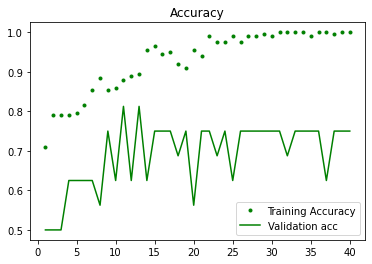

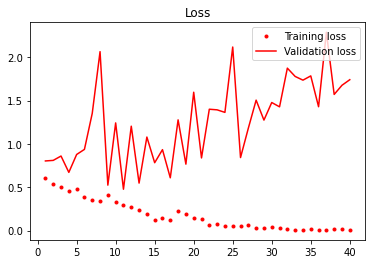

In [116]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [110]:
results_train = model.evaluate(train_images, train_y)

7/7 [==============================] - 0s 7ms/step - loss: 8.9096e-04 - acc: 1.0000


In [111]:
results_val = model.evaluate(val_images, val_y)

1/1 [==============================] - 0s 499us/step - loss: 1.7688 - acc: 0.8125


In [117]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 8ms/step - loss: 2.1208 - acc: 0.6667


In [118]:
results_test

[2.120845079421997, 0.6666666865348816]

In [112]:
results_train

[0.0008909601019695401, 1.0]

In [113]:
results_val

[1.7688368558883667, 0.8125]

With the results as indicated in the two previous cells, we can see our final model is overfitted.  Steps to take in order to reduce overfitting would include adding dropout layers, reducing the number of layers, L1 / L2 regularization, or augmenting the data.

# Misc

X = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\NORMAL\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X.append (image)
print('X shape:', np.array(X).shape)

y = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\PNEUMONIA\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    y.append (image)
print('y shape:', np.array(y).shape)

load image as pixel array
image = image.imread("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\IM-0151-0001.jpeg")
summarize shape of the pixel array
print(image.dtype)
print(image.shape)
display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()